# MOVIE CORRELATION

Questions:- <br>
- Try to find correlations between features
- Exploring whether budgets, genres and companies have an effect on box office successes and critical successes.

In [2]:
#importing all the libraries required

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Reading and Cleaning

In [3]:
df=pd.read_csv('movies.csv')

In [4]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.shape

(7668, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
round(df.describe(),2)

,year,score,votes,budget,gross,runtime
count,7668.00,7665.00,7665.00,5.497000e+03,7.479000e+03,7664.00
mean,2000.41,6.39,88108.50,3.558988e+07,7.850054e+07,107.26
std,11.15,0.97,163323.76,4.145730e+07,1.657251e+08,18.58
min,1980.00,1.90,7.00,3.000000e+03,3.090000e+02,55.00
25%,1991.00,5.80,9100.00,1.000000e+07,4.532056e+06,95.00
50%,2000.00,6.50,33000.00,2.050000e+07,2.020576e+07,104.00
75%,2010.00,7.10,93000.00,4.500000e+07,7.601669e+07,116.00
max,2020.00,9.30,2400000.00,3.560000e+08,2.847246e+09,366.00


In [8]:
df['year_fix']=df['released'].astype('str').str.extract('(\d{4})')

In [9]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
year_fix     object
dtype: object

In [10]:
#missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
year_fix       2
dtype: int64

In [11]:
#Performing mean replacement to fill the null values

df['budget'].fillna(df['budget'].mean(), inplace = True)
df['gross'].fillna(df['gross'].mean(), inplace = True)

In [12]:
#now no need to worry on rating and other company null values..

df[df.year_fix.isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,3.558988e+07,7.850054e+07,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,3.558988e+07,7.850054e+07,NaN,NaN,NaN


In [13]:
df['year_fix'].fillna(df['year'],inplace=True)

In [14]:
df[df.year_fix.isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix


In [15]:
df['gross']=df['gross'].astype('int64')
df['budget']=df.budget.astype('int64')

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [17]:
df.sort_values(by=['gross'],ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [17]:
df.sort_values(by=['gross'],ascending=False).tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,3000,309,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,3000,309,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,3000,309,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,3000,309,Budapest Stúdió Vállalat,104.0,1990
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,3000,309,PK 65 Films,102.0,2020


In [18]:
#For finding the least movie with the available data
df0=df.copy()
df0=df0.dropna()  
df0.sort_values(by=['gross'],ascending=False).tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35589876,1672,Polygram Filmed Entertainment,87.0,1998
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35589876,1605,Balboa Entertainment,110.0,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,2020
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85.0,1997


##### Findings:
- Avatar is the highest gross movie.
- Trojan War is the least gross movie. (With the data available)


In [19]:
df.duplicated().sum()

0

#### Data Exploration and Visualization

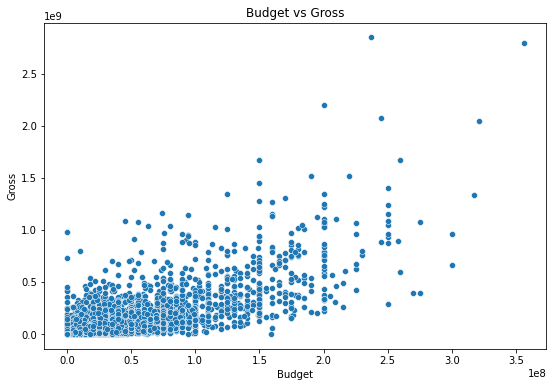

In [20]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='budget', y='gross',data=df)

# Set chart title and labels
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

# Show the chart
plt.show()

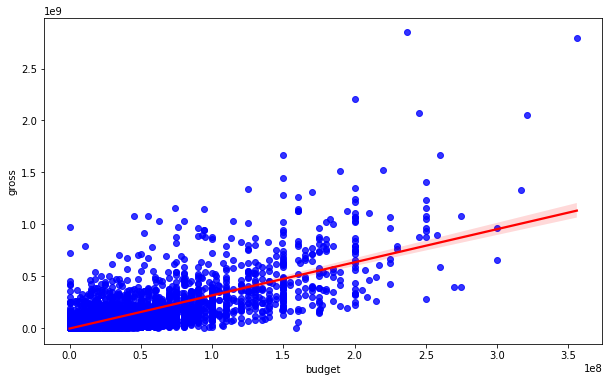

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(x='budget', y='gross',data=df,scatter_kws={"color":"blue"}, line_kws={"color":"red"})
plt.show()

##### Finding:-
- Looks like some relation with budget and gross
- Will have a look at correlation using pearson or spearman correlation 

In [20]:
#looking for some correlation
df.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.202558,0.267101,0.142977
score,0.099045,1.000000,0.428138,0.004735,0.118024,0.399857
votes,0.469829,0.428138,1.000000,0.235205,0.688537,0.290159
budget,0.202558,0.004735,0.235205,1.000000,0.361668,0.227921
gross,0.267101,0.118024,0.688537,0.361668,1.000000,0.227892
runtime,0.142977,0.399857,0.290159,0.227921,0.227892,1.000000


In [21]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.120811,0.399451,0.309212,0.265305,0.241336,1.000000


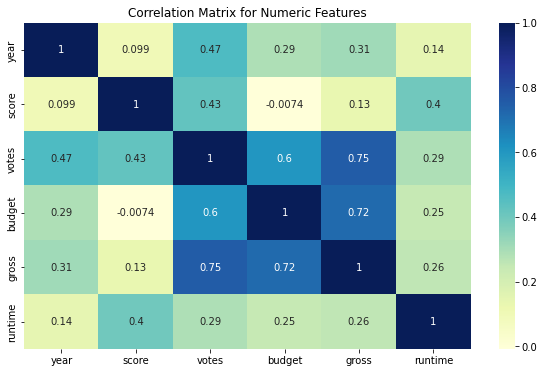

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(method="spearman"), annot=True,cmap="YlGnBu")
plt.title('Correlation Matrix for Numeric Features')
plt.show()

##### Findings:
- It seems that based on the scatterplot and correlation method, the movie budget is highly correlated with gross revenue
- And this confirms that budget and gross has good relation.
- Even the voting shows some strong relation with budget and gross.


In [22]:
#Now we know that budget closely correlated with gross revenue of a Movie
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
year_fix     object
dtype: object

In [23]:
#we can have a check how a company role plays

In [24]:
df_category = df.copy()


for col_name in df_category.columns:
    if(df_category[col_name].dtype == 'object'):
        df_category[col_name]= df_category[col_name].astype('category').cat.codes
        
df_category

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,78500541,-1,90.0,41
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,35589876,78500541,539,90.0,41
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,78500541,941,NaN,41
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,78500541,-1,120.0,41


In [25]:
df_category.dtypes

name          int16
rating         int8
genre          int8
year          int64
released      int16
score       float64
votes       float64
director      int16
writer        int16
star          int16
country        int8
budget        int64
gross         int64
company       int16
runtime     float64
year_fix       int8
dtype: object

In [27]:
df_category.corr('spearman')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
name,1.000000,-0.012197,0.015940,0.011978,-0.011298,0.011505,0.008739,0.008912,0.009201,0.006639,-0.007715,0.013837,-0.003232,0.010211,0.015295,0.010777
rating,-0.012197,1.000000,0.123670,-0.000120,0.031884,0.024234,0.022363,0.010232,0.001379,0.017564,0.025221,-0.192278,-0.173916,-0.079008,0.072508,-0.000044
genre,0.015940,0.123670,1.000000,-0.081261,0.029685,0.067659,-0.204214,-0.016710,0.003902,-0.004860,-0.067968,-0.252379,-0.275998,-0.089637,-0.023203,-0.077352
year,0.011978,-0.000120,-0.081261,1.000000,-0.000334,0.099045,0.469829,-0.019843,-0.008666,-0.026876,-0.088509,0.202558,0.267101,-0.004300,0.142977,0.996530
released,-0.011298,0.031884,0.029685,-0.000334,1.000000,0.041079,-0.014314,-0.001206,-0.002330,0.015694,-0.026772,-0.000815,-0.041609,-0.007243,0.006738,-0.003465
score,0.011505,0.024234,0.067659,0.099045,0.041079,1.000000,0.428138,0.014691,0.019175,0.000372,-0.218330,0.004735,0.118024,-0.006822,0.399857,0.107995
votes,0.008739,0.022363,-0.204214,0.469829,-0.014314,0.428138,1.000000,0.019429,0.013890,-0.013697,0.073396,0.235205,0.688537,0.185955,0.290159,0.462100
director,0.008912,0.010232,-0.016710,-0.019843,-0.001206,0.014691,0.019429,1.000000,0.299032,0.039391,0.012424,-0.018486,0.016567,0.004255,0.015192,-0.019396
writer,0.009201,0.001379,0.003902,-0.008666,-0.002330,0.019175,0.013890,0.299032,1.000000,0.027368,0.011371,-0.024131,0.000749,0.005256,-0.012915,-0.008429
star,0.006639,0.017564,-0.004860,-0.026876,0.015694,0.000372,-0.013697,0.039391,0.027368,1.000000,-0.020899,-0.006374,-0.014484,0.010087,0.008661,-0.027146


In [28]:
df_category.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010392,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062145,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052711,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120811,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,-0.010474,0.000868,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.064554,0.182868,0.001030,0.399451,0.106295
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.421090,0.628713,0.133204,0.309212,0.218289
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017624,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003511,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010174,-0.027606


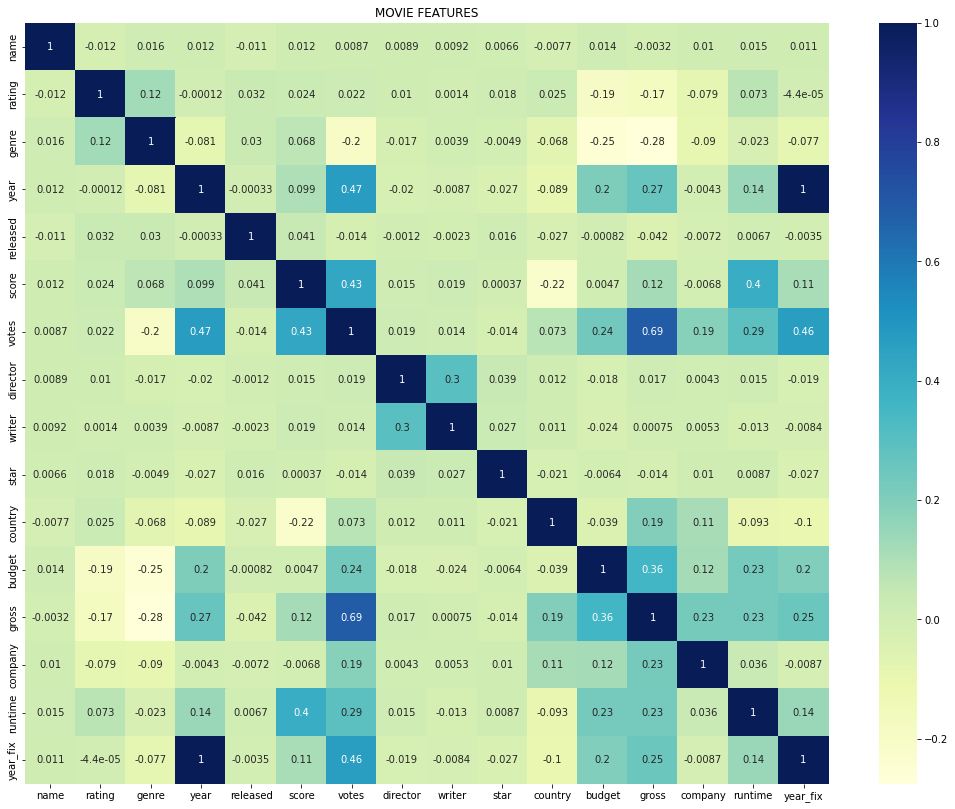

In [29]:
plt.figure(figsize=(18,14))
sns.heatmap(df_category.corr(method="spearman"), annot=True,cmap="YlGnBu")
plt.title('MOVIE FEATURES')
plt.show()

##### Findings:-
- Not much of a with company and gross revenue.
- Voting has a good relation with gross.

In [31]:
genre_count=df.genre.value_counts()
genre_count


Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Romance        10
Sci-Fi         10
Western         3
Musical         2
Sport           1
Music           1
History         1
Name: genre, dtype: int64

In [32]:
k=df[['genre','votes']].groupby('genre').sum().sort_values(by=['votes'], ascending=True)
k

,votes
genre,
History,79.0
Sport,691.0
Musical,962.0
Western,6199.0
Music,12000.0
Thriller,318891.0
Romance,359974.0
Family,753550.0
Sci-Fi,884930.0


<Figure size 1008x576 with 0 Axes>

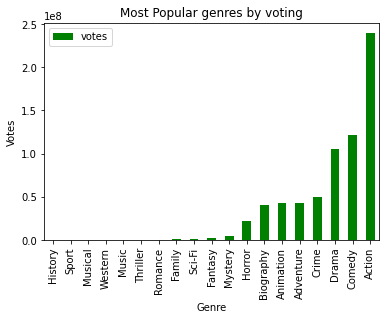

In [33]:
plt.figure(figsize=(14,8))
k.plot(kind="bar",color='green')
plt.title("Most Popular genres by voting")
plt.xlabel("Genre")
plt.ylabel("Votes")
plt.show()

##### Finding:- 
- This show there are genres that impacts some part of gross revenue.
- Action, Comedy and Drama are the top 3 popular genres.

                  gross
genre                  
Action     245947873066
Comedy     101335997135
Animation   80377547419
Drama       61075675587
Adventure   46466100480
Crime       22061953191
Biography   21514587211
Horror      15720837717
Family       2157897417
Mystery      2023670554
Fantasy      1743001676
Thriller      637225277
Sci-Fi        417490948
Romance       345396081
History        78500541
Western        32025886
Musical         5190692
Sport           1067629
Music            110014


<Figure size 1296x576 with 0 Axes>

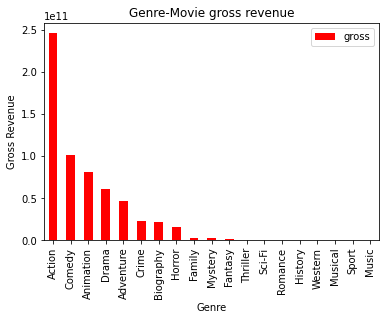

In [34]:
k1=df[['genre','gross']].groupby('genre').sum().sort_values(by=['gross'], ascending=False)
print(k1)
plt.figure(figsize=(18,8))
k1.plot(kind="bar",color='red')
plt.title("Genre-Movie gross revenue")
plt.xlabel("Genre")
plt.ylabel("Gross Revenue")
plt.show()

In [35]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'year_fix'],
      dtype='object')

<Figure size 1440x1080 with 0 Axes>

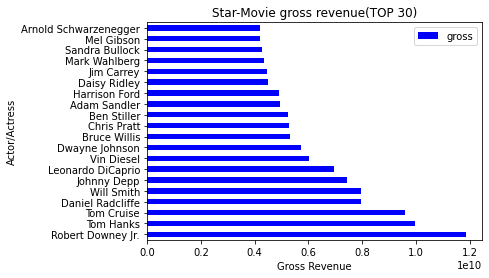

In [39]:
#lets see actors and directors

plt.figure(figsize=(20,15))
k2=df[['star','gross']].groupby('star').sum().sort_values(by=['gross'], ascending=False).head(20)
k2.plot(kind="barh",color='blue')
plt.title("Star-Movie gross revenue(TOP 30)")
plt.xlabel("Gross Revenue")
plt.ylabel("Actor/Actress")
plt.show()


<Figure size 1080x720 with 0 Axes>

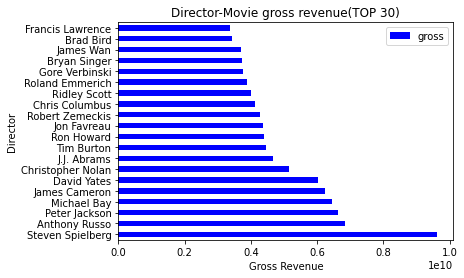

In [40]:
plt.figure(figsize=(15,10))
k2=df[['director','gross']].groupby('director').sum().sort_values(by=['gross'], ascending=False).head(20)

k2.plot(kind="barh",color='blue')
plt.title("Director-Movie gross revenue(TOP 30)")
plt.xlabel("Gross Revenue")
plt.ylabel("Director")
plt.show()


# CONCLUSION:
- Yes, Budget plays a major role in the gross revenue.
- Even the fame of actor/actress and directors play a major role too.
- Among all genre's Action, Comedy and Drama are the 3 popular Genre's that produced good revenue.
- Company doesn't play bigger part in the revenue generation. 
- If a movie wants to have a chance of higher gross, the producer needs to consider all data shown above.